# The Packages

In [1]:
import numpy as np
import pandas as pd
import os
import gc
import datetime
import warnings

In [2]:
# DATA VISUALIZATION
# ------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (20.0, 10.0)
sns.set_style("darkgrid")
sns.color_palette("mako", as_cmap=True)
import plotly.express as px



In [3]:
# CONFIGURATIONS
# ------------------------------------------------------
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format
warnings.filterwarnings('ignore')


# Utility Functions

In [4]:
def plotSeries(time, series, lab,form='-'):
    plt.plot(time, series, form, label=lab)
    plt.xlabel("Date")
    plt.ylabel("Close Price")
    plt.grid(True)

# The Data

In [5]:
wfc = pd.read_csv('Dataset/WFC Daily1.csv')

In [6]:
wfc.head(2), wfc.shape

(         Date  Open  High   Low  Close  Adj Close    Volume
 0  2000-01-03 20.16 20.19 19.00  19.56      10.44   9037000
 1  2000-01-04 18.62 18.84 18.00  18.59       9.92  15237200,
 (5754, 7))

In [7]:
wfc.Date.dtype

dtype('O')

In [8]:
wfc['Date'] = pd.to_datetime(wfc['Date'])
#wfc.set_index(['Date'],inplace=True)

In [9]:
wfc.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,20.16,20.19,19.00,19.56,10.44,9037000
1,2000-01-04,18.62,18.84,18.00,18.59,9.92,15237200
2,2000-01-05,18.50,18.88,18.03,18.41,9.82,8228200


In [10]:
wfc.tail(2)

,Date,Open,High,Low,Close,Adj Close,Volume
5752,2022-11-10,47.02,48.11,46.93,47.95,47.95,23091900
5753,2022-11-11,48.10,48.36,47.33,47.55,47.55,18060100


In [11]:
wfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5754 entries, 0 to 5753
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5754 non-null   datetime64[ns]
 1   Open       5754 non-null   float64       
 2   High       5754 non-null   float64       
 3   Low        5754 non-null   float64       
 4   Close      5754 non-null   float64       
 5   Adj Close  5754 non-null   float64       
 6   Volume     5754 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 314.8 KB


In [12]:
correlation = wfc.corr ()  
correlation. style.background_gradient ()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999324,0.999274,0.998754,0.965403,-0.184389
High,0.999324,1.000000,0.998796,0.999323,0.967945,-0.169457
Low,0.999274,0.998796,1.000000,0.999303,0.963519,-0.199335
Close,0.998754,0.999323,0.999303,1.000000,0.966149,-0.183272
Adj Close,0.965403,0.967945,0.963519,0.966149,1.000000,-0.080189
Volume,-0.184389,-0.169457,-0.199335,-0.183272,-0.080189,1.000000


In [13]:
wfc.drop(["Open", "High", "Low", "Adj Close"], axis = 1, inplace=True)
wfc.head()

,Date,Close,Volume
0,2000-01-03,19.56,9037000
1,2000-01-04,18.59,15237200
2,2000-01-05,18.41,8228200
3,2000-01-06,19.22,8326800
4,2000-01-07,19.56,7711200


In [14]:
#Week Starts with Monday
wfc["Day"] = wfc.Date.dt.weekday
wfc.head(3)

,Date,Close,Volume,Day
0,2000-01-03,19.56,9037000,0
1,2000-01-04,18.59,15237200,1
2,2000-01-05,18.41,8228200,2


In [15]:
wfc["volumeChange"] = wfc["Volume"].pct_change()*100
wfc["volumeChange"] = wfc["volumeChange"].shift(periods=-1)

In [16]:
wfc.drop(["Volume"], axis = 1, inplace=True)

In [17]:
wfc.head(2)

,Date,Close,Day,volumeChange
0,2000-01-03,19.56,0,68.61
1,2000-01-04,18.59,1,-46.00


In [18]:
wfc["closeChange"] = wfc["Close"].pct_change()*100
wfc["closeChange"] = wfc["closeChange"].shift(periods=-1)

In [19]:
# window_size  = 200
  
# # Get the window of series
# # of observations of specified window size
# windows = wfc.Close.rolling(window_size)
  
# # Create a series of moving
# # averages of each window
# moving_averages = windows.mean()
  
# # Convert pandas series back to list
# moving_averages_list = moving_averages.tolist()
  
# # Remove null entries from the list
# # final_list = moving_averages_list[window_size - 1:]

In [20]:
ema10 = wfc.Close.ewm(span=10).mean()
ema20 = wfc.Close.ewm(span=20).mean()
ema50 = wfc.Close.ewm(span=50).mean()
ema100 = wfc.Close.ewm(span=100).mean()

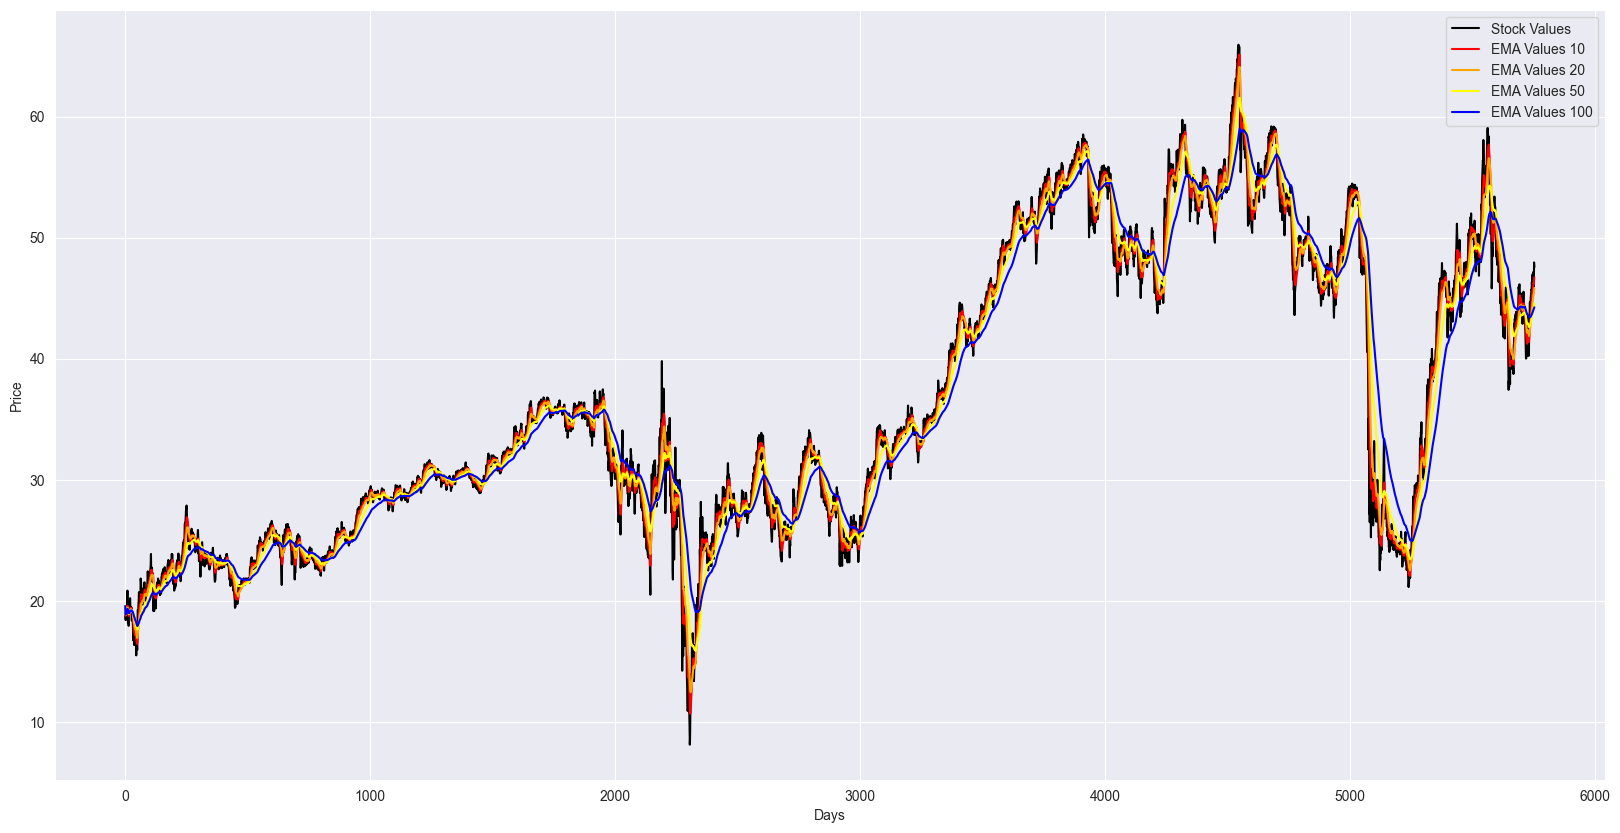

In [21]:
# Comparison plot b/w stock values & EMA
plt.plot(wfc.Close, label="Stock Values", color="black")
plt.plot(ema10, label="EMA Values 10", color="r")
plt.plot(ema20, label="EMA Values 20", color="orange")
plt.plot(ema50, label="EMA Values 50", color="yellow")
plt.plot(ema100, label="EMA Values 100", color="b")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()

In [22]:
wfc["EMA 10"] = ema10
wfc["EMA 20"] = ema20
wfc["EMA 50"] = ema50
wfc["EMA 100"] = ema100

wfc.head()

,Date,Close,Day,volumeChange,closeChange,EMA 10,EMA 20,EMA 50,EMA 100
0,2000-01-03,19.56,0,68.61,-4.95,19.56,19.56,19.56,19.56
1,2000-01-04,18.59,1,-46.00,-1.01,19.03,19.05,19.07,19.07
2,2000-01-05,18.41,2,1.20,4.41,18.78,18.82,18.84,18.85
3,2000-01-06,19.22,3,-7.39,1.79,18.92,18.93,18.94,18.94
4,2000-01-07,19.56,4,16.11,-3.19,19.11,19.08,19.07,19.07


In [23]:
wfc["ROC5"] = wfc.closeChange.rolling(5).mean()
wfc["ROC10"] = wfc.closeChange.rolling(10).mean()
wfc["ROC15"] = wfc.closeChange.rolling(15).mean()
wfc["ROC20"] = wfc.closeChange.rolling(20).mean()
wfc = wfc.fillna(0)

In [24]:
wfc.head(3)

,Date,Close,Day,volumeChange,closeChange,EMA 10,EMA 20,EMA 50,EMA 100,ROC5,ROC10,ROC15,ROC20
0,2000-01-03,19.56,0,68.61,-4.95,19.56,19.56,19.56,19.56,0.00,0.00,0.00,0.00
1,2000-01-04,18.59,1,-46.00,-1.01,19.03,19.05,19.07,19.07,0.00,0.00,0.00,0.00
2,2000-01-05,18.41,2,1.20,4.41,18.78,18.82,18.84,18.85,0.00,0.00,0.00,0.00


In [35]:
wfc.isnull().sum().sort_values(ascending = False).head(3)

Date     0
Close    0
Day      0
dtype: int64

# Treasury Rates

In [27]:
dtb3 = pd.read_csv('Dataset/DTB3.csv')
dtb6 = pd.read_csv('Dataset/DTB6.csv')
dgs5 = pd.read_csv('Dataset/DGS5.csv')

In [75]:
dtb3.head(3)

,DATE,TB3MS
0,2000-01-01,5.32
1,2000-02-01,5.55
2,2000-03-01,5.69


In [77]:
dtb6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5965 entries, 0 to 5964
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DATE    5965 non-null   object
 1   DTB6    5965 non-null   object
dtypes: object(2)
memory usage: 93.3+ KB


In [32]:
dtb6.head(3)

,DATE,DTB6
0,2000-01-03,5.550
1,2000-01-04,5.500
2,2000-01-05,5.490


In [33]:
dgs5.head(3)

,DATE,DGS5
0,2000-01-03,6.50
1,2000-01-04,6.40
2,2000-01-05,6.51


In [36]:
mergedDf = pd.merge(dtb6, dgs5, how='outer', on="DATE")
mergedDf.head(3)

,DATE,DTB6,DGS5
0,2000-01-03,5.550,6.50
1,2000-01-04,5.500,6.40
2,2000-01-05,5.490,6.51


In [37]:
mergedDf.isnull().sum().sort_values(ascending = False).head(3)

DATE    0
DTB6    0
DGS5    0
dtype: int64

In [66]:
df2 = wfc.copy()
df1 = dtb3.copy()

In [67]:
df2 = df2.reset_index()
df1["month"] = df1['DATE'].dt.month

AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:


merged_df = pd.merge(
    df2,
    df1["TB3MS"],
    left_on=df2['Date'].dt.month,
    right_on= 

)

In [40]:
mergedDf["DTB3"] = mergedDf.index.to_period('M').to_series().map(dtb3)
mergedDf.head(4)

AttributeError: 'RangeIndex' object has no attribute 'to_period'

In [ ]:
df_daily['a'] / df_daily["month"].map(df_monthly)

# The Split

In [ ]:
min_date = wfc.Date.min()
max_date = wfc.Date.max()
print("Min:", min_date, "Max:", max_date)

In [ ]:
train_percent = .75
valid_percent = .12

time_between = max_date - min_date

train_cutoff = min_date + train_percent*time_between
valid_cutoff = min_date + (train_percent + valid_percent)*time_between

print("Training Cutoff Date: {:s}".format(str(train_cutoff)))
print("Validation Cutoff Date: {:s}".format(str(valid_cutoff)))

In [ ]:
train_df = wfc[wfc.Date <= train_cutoff]
valid_df = wfc[(wfc.Date > train_cutoff) & (wfc.Date <= valid_cutoff)]
test_df = wfc[wfc.Date > valid_cutoff]


In [ ]:
print("Dataset shape: {:s}".format(str(wfc.shape)))
print("Train dataset shape: {:s}".format(str(train_df.shape)))
print("Vaid dataset shape: {:s}".format(str(valid_df.shape)))
print("Test dataset shape: {:s}".format(str(test_df.shape)))

# Stock Price Graph

In [ ]:
plt.figure(figsize=(18, 10))

plotSeries(train_df.Date, train_df.Close, "Training Data")
plotSeries(valid_df.Date, valid_df.Close, "Validation Data")
plotSeries(test_df.Date, test_df.Close, "Test Data")
plt.legend(loc='upper left')

In [ ]:
train_df["volumeChange"] = train_df["Volume"].pct_change()*100
train_df["volumeChange"] = train_df["volumeChange"].shift(periods=-1)

In [ ]:
train_df = train_df.ffill(axis = 0)

In [ ]:
train_df.head()

In [ ]:
train_df.drop(["Volume"], axis = 1, inplace=True)
train_df.head(2)

In [ ]:
# train_df.to_csv("Dataset/trainDf.csv", index = False)
# valid_df.to_csv("Dataset/validDf.csv", index = False)
# test_df.to_csv("Dataset/testDf.csv", index = False)